# Exploratory Data Analysis and Visualization on ReadWorks articles

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

import plotly.express as px
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

import cufflinks as cf 
from readability import Readability
import spacy

In [4]:
df = pd.read_csv('ReadWorks_Clean1', index_col = 0)     
df_clean = pd.read_csv('data_clean')
df['General Category'] = pd.DataFrame(df.Category.apply(lambda x: (x.split(','))[0]))  
df['Text'] = df['Text'].astype(str)

# Transferring the count_entities column onto the primary dataframe
df['Named Entities'] = df_clean['Count_Entities'].values

##  Sentiment Analysis
Using nltk and spacy to determine each text's overall sentiment

In [5]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['Polarity'] = df['Text'].apply(pol)
df['subjectivity'] = df['Text'].apply(sub)
df

,Text,Category,Grade,Word Count,Lexile,Type,General Category,Named Entities,Polarity,subjectivity
An Unlikely Parasite: The Mistletoe,"During the holidays, many people hang mistleto...",Life Science,3.0,303.0,790.0,Nonfiction,Life Science,4,0.146667,0.354583
The Song of Wandering Aengus,"I went out to the hazel wood,,Because a fire w...",Poetry,7.0,165.0,NaN,Poetry,Poetry,5,0.010417,0.275000
Thanksgiving: Fact or Fiction,This article is provided courtesy of History.c...,U. S. History,7.5,1217.0,1460.0,Nonfiction,U. S. History,179,0.119618,0.433465
Native American Conflicts,"Jamestown logo for World's Fair in 1907,Prior ...","Geography& Societies, U. S. History",9.5,554.0,1340.0,Nonfiction,Geography& Societies,65,0.105740,0.360446
A Monument for Peace,"In December, 1864, the Civil War was nearly ov...","Arts& Culture, U. S. History",6.5,517.0,910.0,Nonfiction,Arts& Culture,58,0.102357,0.381615
...,...,...,...,...,...,...,...,...,...,...
Martin Luther King Jr.,Martin Luther King Jr. was a leader. When he w...,U. S. History,1.0,87.0,470.0,Nonfiction,U. S. History,8,0.294378,0.644082
Native American Powwows,Some Native Americans hold powwows today. Thes...,"Arts& Culture, Geography& Societies",1.0,96.0,660.0,Nonfiction,Arts& Culture,19,0.071851,0.364643
What is a Talking Stick?,"Photo Credit: Library of Congress, ,For hundre...","Arts& Culture, Geography& Societies",1.0,108.0,550.0,Nonfiction,Arts& Culture,7,0.312500,0.500000
People Need the Ocean,People today could not live without the ocean....,Geography& Societies,1.0,119.0,460.0,Nonfiction,Geography& Societies,2,0.103409,0.484375


3D plot, overall overview of text features.

In [6]:
df.to_csv('data_features')

In [7]:
fig1 = px.scatter_3d(df, x='Word Count', y='Lexile', z='Polarity', size='Named Entities', color='General Category')

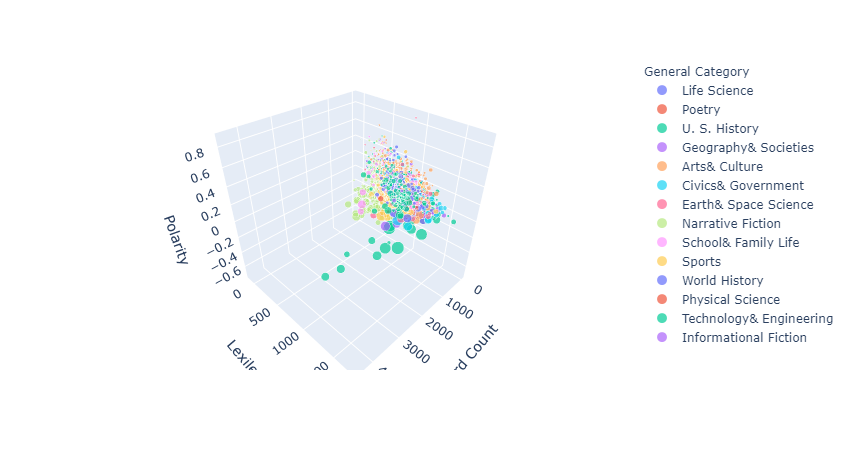

In [8]:
fig1